In [214]:
import numpy as np
import random
import math
import itertools
import numpy as np

1. Read Data

In [216]:
x1=[-1,-1,1]
x2=[1,-1,1]
x3=[-1,1,1]
x4=[1,1,-1]
x1 = np.array([[-1], [-1], [1]])
x2 = np.array([[1], [-1], [1]])
x3 = np.array([[-1], [1], [1]])
x4 = np.array([[1], [1], [-1]])

patterns=[x1,x2,x3,x4]

2. Train

In [286]:
#probability
def probability(b):
    return 1/(1+np.exp(-2*b))

#init parameters
#Data inputs ar column vectors (3x1)
#Weights are Mx3
def init(M):
    std=np.sqrt(max(M,3))
    W = np.random.normal(loc=0.0, scale=1.0/std, size=(M, 3))
    np.fill_diagonal(W, 0)
    threshold_hidden = np.zeros((M, 1))  # Shape (M, 1)
    threshold_visible = np.zeros((3, 1))  # Shape (3, 1)
    
    return W,threshold_hidden,threshold_visible

#Train
#hidden output:h 3x1
#visible output:v 3x1
#b_v: hidden neuron 3x1
#b_h: hidden neuron 3x1
def train(M,k,v_max,learning_rate,W,threshold_hidden,threshold_visible):
    for epoch in range(vmax):#
        #sample p patterns without repetition
        pattern_sample=random.choices(patterns,k=k)

        for mu in patterns:
            #to store updates
            b_v=[] #b visible
            b_h=[] #b hidden
            s_v=[] #state of v after activation(b_v)
            s_h=[]

            #set pattern s_v(0)
            sv=mu
            s_v.append(sv)

            #update hidden b_h(0)
            bh=W@sv - threshold_hidden #8x1
            b_h.append(bh)

            #s_h(0)
            sh=bh.copy()
            for i in range(M):
                #activate or desactive i with probability b
                p_bh=probability(bh[i])
                h_i= 1 if np.random.rand() < p_bh else -1
                sh[i][0]=h_i
            s_h.append(sh)

            for t in range(k):
                #update visible neurons (start with b_v(0))
                bv=W.T@sh - threshold_visible #3x1
                b_v.append(bv)
                #compute s_v starting with s_v(1)
                sv=bv.copy()
                for j in range(3):
                    p_bv=probability(bv[j])
                    v_j= 1 if np.random.rand() < p_bv else -1
                    sv[j][0]=v_j
                s_v.append(sv)

                #update hidden neurons (follows b_h(1))
                bh=W@sv - threshold_hidden #8x1
                b_h.append(bh)
                sh=bh.copy()
                for i in range(M):
                    p_bh=probability(bh[i])
                    h_i= 1 if np.random.rand() < p_bh else -1
                    sh[i][0]=h_i
                s_h.append(sh)

            #update parameters for each pattern
            delta_w = np.zeros((M, 3))
            for i in range(M):
                for j in range(3):
                    part1=math.tanh(b_h[0][i])*s_v[0][j]
                    part2=math.tanh(b_h[-1][i])*s_v[-1][j]
                    update=(learning_rate*(part1-part2))
                    delta_w[i][j]=update
            W=W+delta_w

            delta_threshold_visible=np.zeros((3,1))
            for i in range(3):
                delta_threshold_visible[i]=-learning_rate*(math.tanh(s_v[0][i])-
                                                           math.tanh(s_v[-1][i]))
            threshold_visible=threshold_visible+delta_threshold_visible

            delta_threshold_hidden=np.zeros((M,1))
            for i in range(M):
                delta_threshold_hidden[i]=-learning_rate*(math.tanh(b_h[0][i])
                                                          -math.tanh(b_h[-1][i]))
            threshold_hidden=threshold_hidden+delta_threshold_hidden
    
    return W,threshold_hidden,threshold_visible

#Test
M=1 #Hidden neurons
k=20
v_max=10000
learning_rate=0.005

W,threshold_hidden,threshold_visible=init(M)
W,threshold_hidden,threshold_visible=train(M,k,v_max,learning_rate,W,threshold_hidden,threshold_visible)

3. Iterate dynamics and get Pdata

In [300]:
#data is one point
def iterate_dynamics(data,W,threshold_hidden,threshold_visible):
    v=data
    
    #hidden
    bh=W@v - threshold_hidden
    sh=bh.copy()
    M=W.shape[0]
    for i in range(M):
        #activate or desactive i with probability b
        p_bh=probability(bh[i])
        h_i= 1 if np.random.rand() < p_bh else -1
        sh[i][0]=h_i
    
    #Output
    bv=W.T@sh - threshold_visible #3x1
    sv=bv.copy()
    for j in range(3):
        p_bv=probability(bv[j])
        v_j= 1 if np.random.rand() < p_bv else -1
        sv[j][0]=v_j
        
    return sv

#sample pbolzman after many iterations
def pbolzman(init_point,iterations,W,threshold_hidden,threshold_visible):
    x1_count=0
    x2_count=0
    x3_count=0
    x4_count=0

    point=iterate_dynamics(init_point,W,threshold_hidden,threshold_visible)

    for i in range(iterations):
        point=iterate_dynamics(point,W,threshold_hidden,threshold_visible)
        
        if (point==x1).all():
            x1_count+=1
        elif (point==x2).all():
            x2_count+=1
        elif (point==x3).all():
            x3_count+=1
        elif (point==x4).all():
            x4_count+=1

    #tot=x1_count+x2_count+x3_count+x4_count
    x1_count=x1_count/iterations
    x2_count=x2_count/iterations
    x3_count=x3_count/iterations
    x4_count=x4_count/iterations
    
    return x1_count,x2_count,x3_count,x4_count

#TEST
p1,p2,p3,p4 = pbolzman(x3.copy(),50000,W,threshold_hidden,threshold_visible)

4. Compute divergence for different simulations and M

In [209]:
M=[1,2,3,4,5,6,7,8]
simulations=20

k=20 #batch
v_max=10000
learning_rate=0.005

results=[]
for m in M:
    
    #compute divervenge various times
    divergences=[]
    
    for simulation in range(simulations):
               
        #init and train
        W,threshold_hidden,threshold_visible=init(m)
        W,threshold_hidden,threshold_visible=train(m,k,v_max,learning_rate,W,threshold_hidden,threshold_visible)

        #get pbolzman sampling
        p1,p2,p3,p4 = pbolzman(x1.copy(),100000,W,threshold_hidden,threshold_visible)
        probs=[p1,p2,p3,p4]

        #compute divergence
        divergence=0
        for p in probs:
            divergence += 0.25*np.log(0.25/p)

        divergences.append(divergence)
        
    results.append(divergences)
    print(m)
        
    


1
2
3
4
5
6
7
8


5. Compute upper bound

In [310]:
def calculate_DKL(N, M):
    # Check the condition for M
    threshold = 2**(N-1) - 1
    
    if M < threshold:
        # Floor of log2(M + 1)
        log_floor = math.floor(math.log2(M + 1))
        # Calculate DKL
        DKL = N - log_floor - (M + 1) / (2 ** log_floor)
        
    else:
        # If M >= 2^(N-1) - 1, DKL is 0
        return 0
    
    return np.log(2)*DKL

# Example usage:
N = 3
M = 2
result = calculate_DKL(N, 2)
print(f"DKL: {result}")

DKL: 0.34657359027997264


6. Plot Results

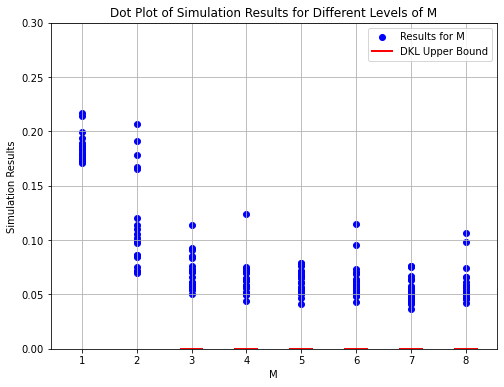

In [307]:
# M values
M=[1,2,3,4,5,6,7,8]
#print(M_values)
#print(results)

# Check if M and results have the same length
if len(M) != len(results):
    raise ValueError("The length of M and results must be the same.")

# Create a dot plot
plt.figure(figsize=(8, 6))

# Define x positions for M labels
x_positions = range(len(M))

# Loop through each value of M and its corresponding results
for i, (x_pos, M_value) in enumerate(zip(x_positions, M)):
    # Plot all results for the current M value at the given x position
    plt.scatter([x_pos] * len(results[i]), results[i], color='blue', label=f'Results for M' if i == 0 else "")

    # Compute DKL(M, 2) for the current M value
    dkl_value = calculate_DKL(3, M_value)
    # Plot the red line for the DKL value at the current x position
    plt.plot([x_pos - 0.2, x_pos + 0.2], [dkl_value, dkl_value], color='red', linewidth=2, label=f'DKL Upper Bound' if i == 0 else "")

# Set x-ticks to the custom positions and label them with the corresponding M values
plt.xticks(x_positions, M)

# Add labels and legend
plt.xlabel('M')
plt.ylabel('Simulation Results')
plt.title('Dot Plot of Simulation Results for Different Levels of M')
plt.ylim(0,0.3)
plt.grid(True)
plt.legend()
plt.show()

In [276]:
# Loop through each value of M and its corresponding results
for M, result in zip(M_values, results):
    # Calculate the mean of the current result set
    mean_result = np.mean(result)
    
    # Print the mean
    print(f'Mean of results for M = {M}: {mean_result:.2f}')

Mean of results for M = 1: 0.18
Mean of results for M = 2: 0.11
Mean of results for M = 3: 0.07
Mean of results for M = 4: 0.06
Mean of results for M = 5: 0.06
Mean of results for M = 6: 0.06
Mean of results for M = 7: 0.06
Mean of results for M = 8: 0.06
